In [75]:
import pandas as pd 
import matplotlib.pyplot as plt 
from datetime import timedelta

data_01 = pd.read_csv('../data/0.1_results_with_calculate_last.csv')
data_02 = pd.read_csv('../data/0.2_results_with_calculate_last.csv')
data_03 = pd.read_csv('../data/0.3_results_with_calculate_last.csv')
data_04 = pd.read_csv('../data/0.4_results_with_calculate_last.csv')
data_05 = pd.read_csv('../data/0.5_results_with_calculate_last.csv')
data_06 = pd.read_csv('../data/0.6_results_with_calculate_last.csv')
data_07 = pd.read_csv('../data/0.7_results_with_calculate_last.csv')
data_08 = pd.read_csv('../data/0.8_results_with_calculate_last.csv')
data_09 = pd.read_csv('../data/0.9_results_with_calculate_last.csv')

frames = [data_01, data_02, data_03, data_04, data_05, data_06, data_07, data_08, data_09]
data_with = pd.concat(frames)

data_01 = pd.read_csv('../data/0.1_results_without_calculate_last.csv')
data_02 = pd.read_csv('../data/0.2_results_without_calculate_last.csv')
data_03 = pd.read_csv('../data/0.3_results_without_calculate_last.csv')
data_04 = pd.read_csv('../data/0.4_results_without_calculate_last.csv')
data_05 = pd.read_csv('../data/0.5_results_without_calculate_last.csv')
data_06 = pd.read_csv('../data/0.6_results_without_calculate_last.csv')
data_07 = pd.read_csv('../data/0.7_results_without_calculate_last.csv')
data_08 = pd.read_csv('../data/0.8_results_without_calculate_last.csv')
data_09 = pd.read_csv('../data/0.9_results_without_calculate_last.csv')

frames = [data_01, data_02, data_03, data_04, data_05, data_06, data_07, data_08, data_09]
data_without = pd.concat(frames)

In [73]:
data_01

,nr,nazwa,pp,numberOfSeeds,seeds,totalNumberOfSeeds,numberOfNodes,steps,infectedTotal,infectedTotalPercentage,computionalTime,limitPercentage
0,6,8,0.1,2,2,250,12591,264,4124,32.753554,"[datetime.timedelta(0, 5, 595197), datetime.ti...",1
1,6,8,0.1,4,4,500,12591,276,4533,36.001906,"[datetime.timedelta(0, 6, 140947), datetime.ti...",1
2,6,8,0.1,8,8,1000,12591,281,5184,41.172266,"[datetime.timedelta(0, 7, 292079), datetime.ti...",1
3,6,8,0.1,16,16,1999,12591,223,6183,49.106505,"[datetime.timedelta(0, 9, 539920), datetime.ti...",1
4,6,8,0.1,2,2,502,12591,490,4538,36.041617,"[datetime.timedelta(0, 5, 603018), datetime.ti...",2
...,...,...,...,...,...,...,...,...,...,...,...,...
1876,4,15,0.1,2,2,622,6229,498,4698,75.421416,"[datetime.timedelta(0, 9, 677230), datetime.ti...",5
1877,4,15,0.1,4,4,1244,6229,449,5318,85.374860,"[datetime.timedelta(0, 11, 308064), datetime.t...",5
1878,4,15,0.1,8,8,2160,6229,362,6229,100.000000,"[datetime.timedelta(0, 14, 387795), datetime.t...",5
1879,4,15,0.1,16,16,2171,6229,199,6229,100.000000,"[datetime.timedelta(0, 20, 643154), datetime.t...",5


In [175]:
# from datetime import timedelta

# x = timedelta(0, 6, 45204568)

# x.total_seconds()

# data_with[data_with['infectedTotalPercentage'] == ]

In [76]:


def changeToDate(x, mapa, unique):
    replaced = x.replace('(', '').replace('[', '').replace(' ', '').replace(')]', '')
    
    if(replaced not in unique):
        unique.append(replaced)

        splited = replaced.split(',')
#         print(splited, 'm', splited[0], 's', splited[1], 'msec', splited[2])

        mapa['m'] += int(splited[0])
        mapa['s'] += int(splited[1])
        mapa['msec'] += int(splited[2])
#         print(mapa)

def convert(x):
    
    temp = x.replace('datetime.timedelta', '').split('),')
#     print('nowy')
    mapa = {'m': 0, 's': 0, 'msec': 0}
    unique = []

    for tmp in temp:        
        changeToDate(tmp, mapa, unique)
        
#     print('koniec z czasem', timedelta(mapa['m'], mapa['s'], mapa['msec']).total_seconds())
    return timedelta(mapa['m'], mapa['s'], mapa['msec']).total_seconds()

#     print([tmp for tmp in temp])
#     print([tmp.apply(lambda x: x.replace('(', '')) for tmp in temp])


# data_with[71:72].apply(lambda x: convert(x['computionalTime']), axis=1)
# data_without[71:72].apply(lambda x: convert(x['computionalTime']), axis=1)

data_with['seconds'] = data_with.apply(lambda x: convert(x['computionalTime']), axis=1)
data_without['seconds'] = data_without.apply(lambda x: convert(x['computionalTime']), axis=1)

# data_with[np.isclose(data_with['infectedTotalPercentage'],95.525154, 0.0001)].apply(lambda x: convert(x['computionalTime']), axis=1)


In [56]:
data_with

,nr,nazwa,pp,numberOfSeeds,seeds,totalNumberOfSeeds,numberOfNodes,steps,infectedTotal,infectedTotalPercentage,computionalTime,limitPercentage,seconds
0,6,8,0.1,2,2,250,12591,264,4124,32.753554,"[datetime.timedelta(0, 5, 595197), datetime.ti...",1,59.083257
1,6,8,0.1,4,4,500,12591,276,4533,36.001906,"[datetime.timedelta(0, 6, 140947), datetime.ti...",1,51.204568
2,6,8,0.1,8,8,1000,12591,281,5184,41.172266,"[datetime.timedelta(0, 7, 292079), datetime.ti...",1,40.390253
3,6,8,0.1,16,16,1999,12591,223,6183,49.106505,"[datetime.timedelta(0, 9, 539920), datetime.ti...",1,33.226255
4,6,8,0.1,2,2,502,12591,490,4538,36.041617,"[datetime.timedelta(0, 5, 603018), datetime.ti...",2,84.508827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,15,0.9,16,16,165,6229,38,6229,100.000000,"[datetime.timedelta(0, 19, 574275), datetime.t...",4,19.673286
1996,1,15,0.9,2,2,128,6229,125,6229,100.000000,"[datetime.timedelta(0, 9, 470666), datetime.ti...",5,9.559978
1997,1,15,0.9,4,4,131,6229,75,6229,100.000000,"[datetime.timedelta(0, 10, 907006), datetime.t...",5,10.983836
1998,1,15,0.9,8,8,143,6229,51,6229,100.000000,"[datetime.timedelta(0, 13, 810188), datetime.t...",5,13.891043


In [3]:
# import matplotlib.pyplot as plt 


# plt.figure();

# fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(30,20))

# net = 

# for nr in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
#     for numberOfSeeds in [2, 4, 8, 16]:
#         for limitPercentage in [2, 3, 4, 5]:
#             for pp in [0.1, 0.2, 0.3]:
#                 subdata_with = data_with[(data_with['nazwa'] == net) & (data_with['nr'] == nr) & (data_with['numberOfSeeds'] == numberOfSeeds) & (data_with['limitPercentage'] == limitPercentage)]
#                 subdata_without = data_without[(data_with['nazwa'] == net) & (data_without['nr'] == nr) & (data_without['numberOfSeeds'] == numberOfSeeds) & (data_without['limitPercentage'] == limitPercentage)]

#     #             subdata_without = data_without[(data_without['nr'] == nr) & (data_without['numberOfSeeds'] == numberOfSeeds) & (data_without['limitPercentage'] == limitPercentage)]
#     #             subdata_with = data_with[(data_with['nr'] == nr) & (data_with['numberOfSeeds'] == numberOfSeeds) & (data_with['limitPercentage'] == limitPercentage)]

#                 ax.scatter(list(range(len(subdata_with.index))), subdata_with['infectedTotalPercentage'], s=1, color='red')
#                 ax.scatter(list(range(len(subdata_without.index))), subdata_without['infectedTotalPercentage'], s=1, color='blue')



<Figure size 432x288 with 0 Axes>

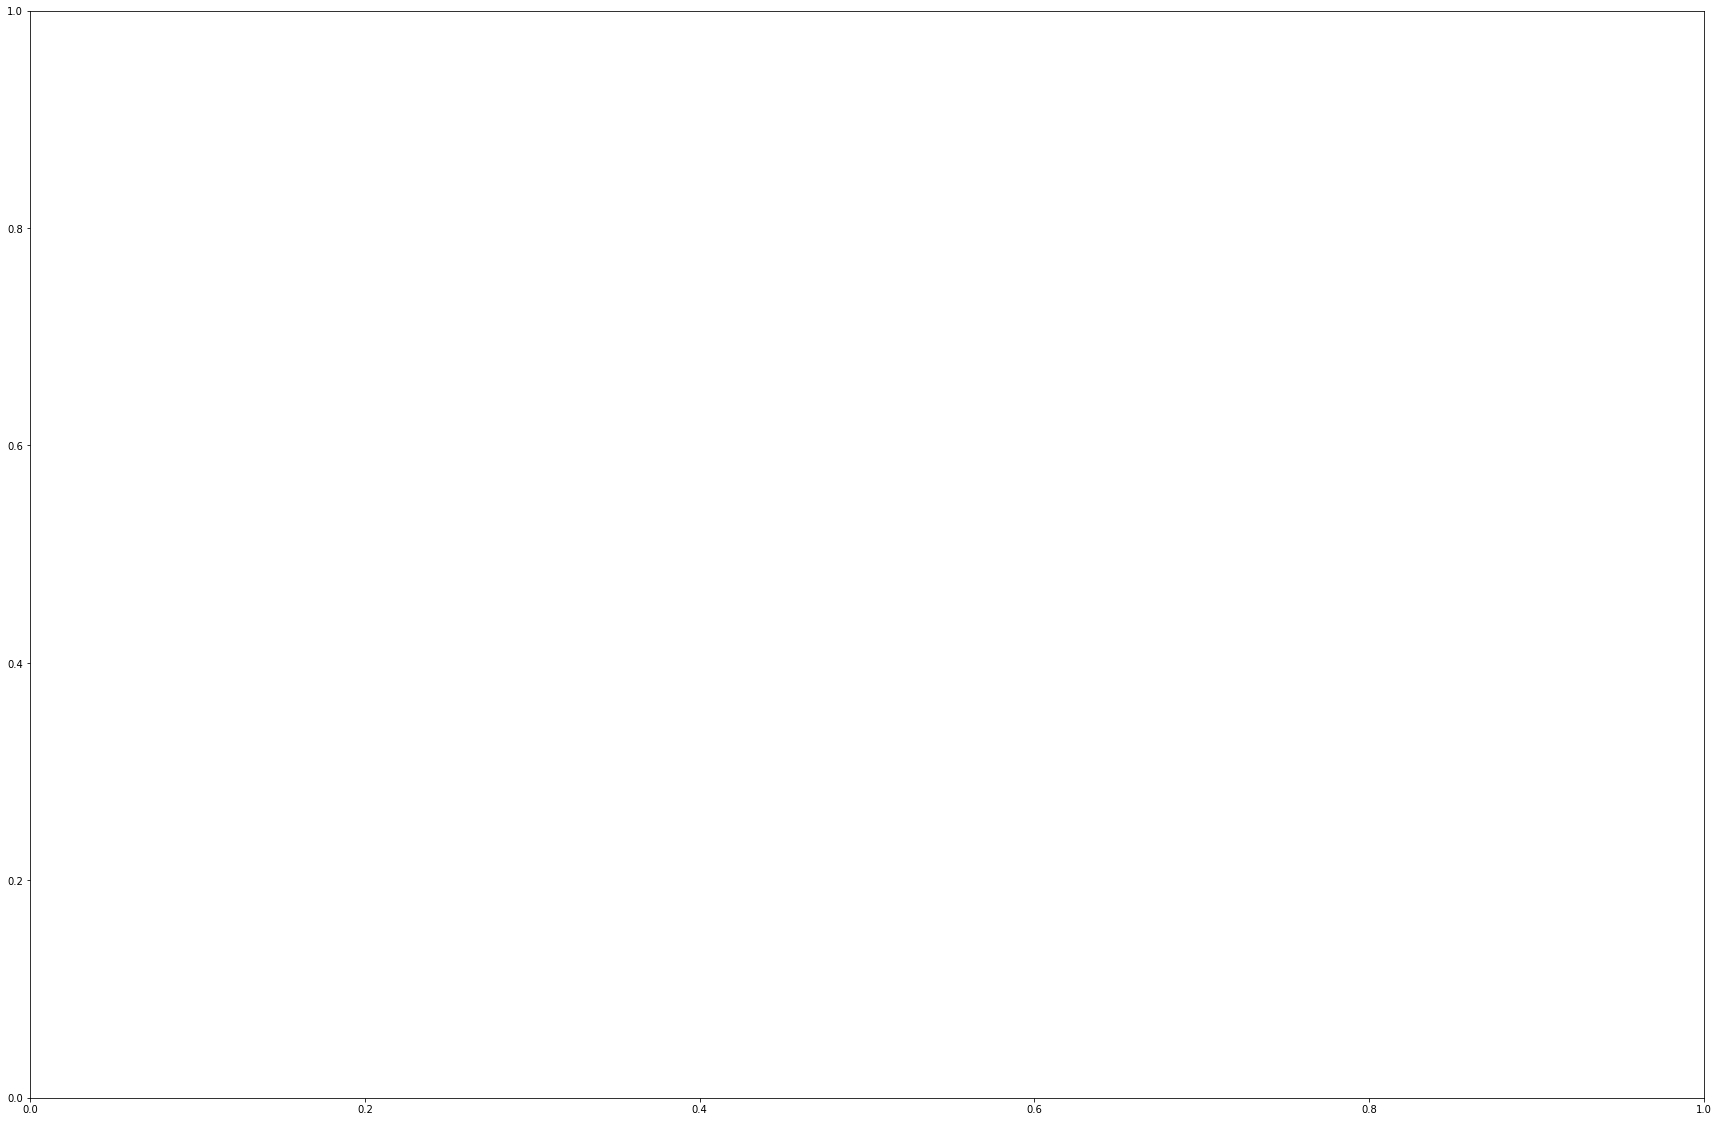

In [100]:
import matplotlib.pyplot as plt 


plt.figure();

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(30,20))

lastRows_with = pd.DataFrame()
lastRows_without = pd.DataFrame()

for net in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
    for pp in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
        for numberOfSeeds in [2, 4, 8, 16]:
            for limitPercentage in [1, 2, 3, 4, 5]:
                subdata_with = data_with[(data_with['nazwa'] == net) & (data_with['pp'] == pp) & (data_with['numberOfSeeds'] == numberOfSeeds) & (data_with['limitPercentage'] == limitPercentage)]
                subdata_without = data_without[(data_without['nazwa'] == net) & (data_without['pp'] == pp) & (data_without['numberOfSeeds'] == numberOfSeeds) & (data_without['limitPercentage'] == limitPercentage)]
                
#                 subdata_without = subdata_without.mean()
#                 subdata_with = subdata_with.mean()

                subdata_without = subdata_without.mean()
                subdata_with = subdata_with.mean()

#                 print(subdata_without['infectedTotal'])
#                 print(subdata_with['infectedTotal'])

                temp_without = pd.DataFrame(subdata_without)
                temp_with = pd.DataFrame(subdata_with)
                
                temp = pd.DataFrame({'limitPercentage': limitPercentage, 'pp': pp, 'seed': numberOfSeeds, 'without': [subdata_without['infectedTotalPercentage']], 'with': [subdata_with['infectedTotalPercentage']], 
                                     'increase': [subdata_with['infectedTotalPercentage'] / subdata_without['infectedTotalPercentage']],'secondsWithout': subdata_without['seconds'], 'secondsWith': subdata_with['seconds']})
                
                lastRows_with = lastRows_with.append(temp)

                                    
#                 lastRows_with = lastRows_with.append(temp_with.mean(), ignore_index=True)
#                 lastRows_without = lastRows_without.append(temp_without.mean(), ignore_index=True)

#                 lastRows_with = lastRows_with.append(temp_with)
#                 lastRows_without = lastRows_without.append(temp_without)


In [140]:
lastRows_with = lastRows_with.sort_values('increase')
# lastRows_with = lastRows_with.dropna()
# lastRows_with

<Figure size 432x288 with 0 Axes>

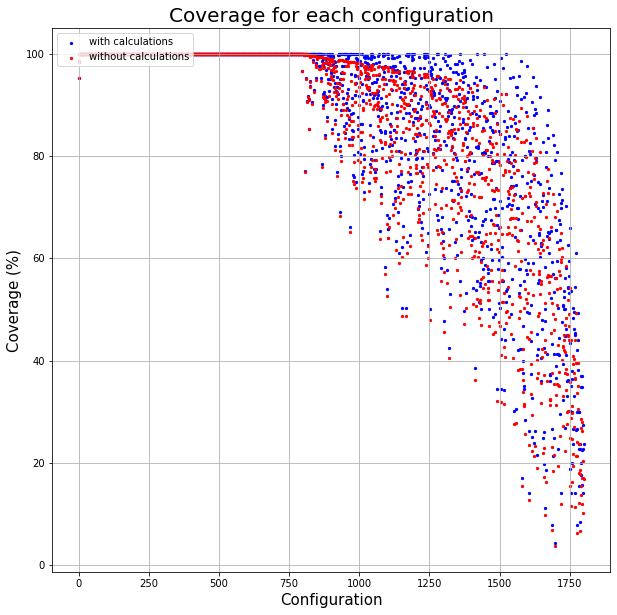

In [144]:
plt.figure();

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))


# ax.scatter(list(range(len(lastRows_with.index))), lastRows_with['infectedTotalPercentage'], s=10, color='red')
# ax.scatter(list(range(len(lastRows_without.index))), lastRows_without['infectedTotalPercentage'], s=5, color='blue')
lastRows_with = lastRows_with.sort_values('increase')


ax.scatter(list(range(len(lastRows_with.index))), lastRows_with['with'], s=5, color='blue', label='with calculations')
ax.scatter(list(range(len(lastRows_with.index))), lastRows_with['without'], s=5, color='red', label='without calculations')

# ax[1].scatter(list(range(len(lastRows_with.index))), lastRows_with['secondsWith'], s=5, color='blue')
# ax[1].scatter(list(range(len(lastRows_with.index))), lastRows_with['secondsWithout'], s=5, color='red')

# ax.scatter(list(range(len(lastRows_with.index))), lastRows_with['with'], s=5, color='blue')
# ax[0].scatter(list(range(len(lastRows_with.index))), lastRows_with['increase'], s=5, color='red')

ax.set_xlabel(r'Configuration', fontsize=15)
ax.set_ylabel(r'Coverage (%)', fontsize=15)
ax.set_title('Coverage for each configuration', fontsize=20)

ax.grid(True)

ax.legend(loc='upper left')

plt.show()


<Figure size 432x288 with 0 Axes>

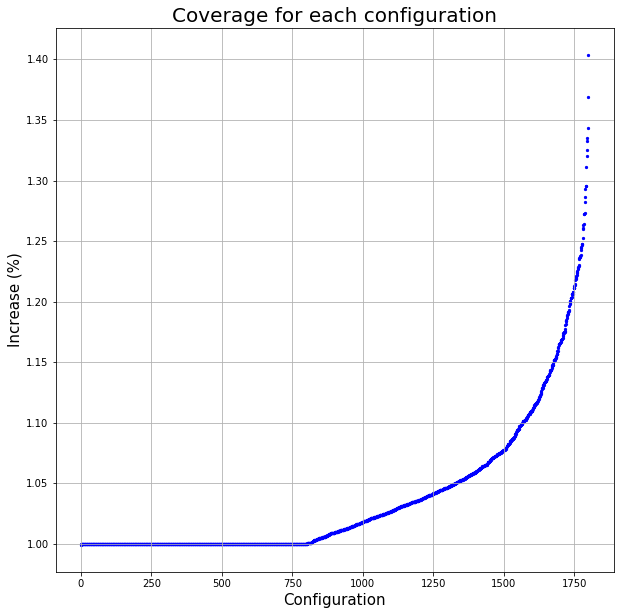

In [143]:
plt.figure();

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))


# ax.scatter(list(range(len(lastRows_with.index))), lastRows_with['infectedTotalPercentage'], s=10, color='red')
# ax.scatter(list(range(len(lastRows_without.index))), lastRows_without['infectedTotalPercentage'], s=5, color='blue')

ax.scatter(list(range(len(lastRows_with.index))), lastRows_with['increase'], s=5, color='blue', label='with calculations')
# ax.scatter(list(range(len(lastRows_with.index))), lastRows_with['without'], s=5, color='red', label='without calculations')

# ax[1].scatter(list(range(len(lastRows_with.index))), lastRows_with['secondsWith'], s=5, color='blue')
# ax[1].scatter(list(range(len(lastRows_with.index))), lastRows_with['secondsWithout'], s=5, color='red')

# ax.scatter(list(range(len(lastRows_with.index))), lastRows_with['with'], s=5, color='blue')
# ax[0].scatter(list(range(len(lastRows_with.index))), lastRows_with['increase'], s=5, color='red')

ax.set_xlabel(r'Configuration', fontsize=15)
ax.set_ylabel(r'Increase (%)', fontsize=15)
ax.set_title('Coverage for each configuration', fontsize=20)

ax.grid(True)

# ax.legend(loc='upper left')

plt.show()


In [93]:
print('Średnie pokrycie dla wszystkich przypadków z przeliczaniem', lastRows_with['with'].mean())
print('Średnie pokrycie dla wszystkich przypadków bez przeliczania', lastRows_with['without'].mean())

Średnie pokrycie dla wszystkich przypadków z przeliczaniem 87.66804590202773
Średnie pokrycie dla wszystkich przypadków bez przeliczania 85.51839051468848


In [103]:
lastRows_with['diff'] = lastRows_with['with'] - lastRows_with['without'] 
lastRows_with

,limitPercentage,pp,seed,without,with,increase,secondsWithout,secondsWith,diff
0,1,0.1,2,13.644860,17.674619,1.295332,49.069474,511.366241,4.029759
0,2,0.1,2,17.793901,22.661707,1.273566,92.024073,853.807393,4.867806
0,3,0.1,2,21.352681,26.636744,1.247466,134.606404,1107.484198,5.284063
0,4,0.1,2,24.616331,30.047959,1.220651,178.368120,1313.738028,5.431628
0,5,0.1,2,27.544270,33.136375,1.203022,220.020830,1466.888443,5.592105
...,...,...,...,...,...,...,...,...,...
0,1,0.9,16,100.000000,100.000000,1.000000,53.446916,19.716077,0.000000
0,2,0.9,16,100.000000,100.000000,1.000000,98.689928,19.713704,0.000000
0,3,0.9,16,100.000000,100.000000,1.000000,144.105041,19.765060,0.000000
0,4,0.9,16,100.000000,100.000000,1.000000,188.483578,19.674363,0.000000


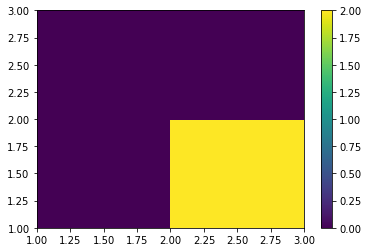

In [137]:
x = [1.6, 2.3, 2.7]
y = [0.7, 1.8, 1.3]
bins = [1,2,3] 
weights = [1, 1, 1]


h,_, _, image = plt.hist2d(x,y,bins=bins, weights=weights)
plt.colorbar(image)
plt.show()